In [1]:
import pandas as pd
import matplotlib.pyplot as plt
df = pd.read_csv ('Zomato-data-.csv')

In [2]:
df.head(10)

,name,online_order,book_table,rate,votes,approx_cost(for two people),listed_in(type)
0,Jalsa,Yes,Yes,4.1/5,775,800,Buffet
1,Spice Elephant,Yes,No,4.1/5,787,800,Buffet
2,San Churro Cafe,Yes,No,3.8/5,918,800,Buffet
3,Addhuri Udupi Bhojana,No,No,3.7/5,88,300,Buffet
4,Grand Village,No,No,3.8/5,166,600,Buffet
5,Timepass Dinner,Yes,No,3.8/5,286,600,Buffet
6,Rosewood International Hotel - Bar & Restaurant,No,No,3.6/5,8,800,Buffet
7,Onesta,Yes,Yes,4.6/5,2556,600,Cafes
8,Penthouse Cafe,Yes,No,4.0/5,324,700,other
9,Smacznego,Yes,No,4.2/5,504,550,Cafes


In [3]:
df.tail(10)

,name,online_order,book_table,rate,votes,approx_cost(for two people),listed_in(type)
138,Sri Murari Family Restaurant,No,No,2.9/5,0,250,Dining
139,Aramane Donne Biriyani,No,No,2.9/5,0,150,Dining
140,Darkolates,No,No,3.3/5,0,200,Dining
141,Swaada Healthy Kitchen,No,No,3.3/5,0,350,Dining
142,Gawdaru Mane Beriyani,No,No,3.3/5,0,300,Dining
143,Melting Melodies,No,No,3.3/5,0,100,Dining
144,New Indraprasta,No,No,3.3/5,0,150,Dining
145,Anna Kuteera,Yes,No,4.0/5,771,450,Dining
146,Darbar,No,No,3.0/5,98,800,Dining
147,Vijayalakshmi,Yes,No,3.9/5,47,200,Dining


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 148 entries, 0 to 147
Data columns (total 7 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   name                         148 non-null    object
 1   online_order                 148 non-null    object
 2   book_table                   148 non-null    object
 3   rate                         148 non-null    object
 4   votes                        148 non-null    int64 
 5   approx_cost(for two people)  148 non-null    int64 
 6   listed_in(type)              148 non-null    object
dtypes: int64(2), object(5)
memory usage: 8.2+ KB


In [5]:
df.describe()

,votes,approx_cost(for two people)
count,148.000000,148.000000
mean,264.810811,418.243243
std,653.676951,223.085098
min,0.000000,100.000000
25%,6.750000,200.000000
50%,43.500000,400.000000
75%,221.750000,600.000000
max,4884.000000,950.000000


In [6]:
df.isnull().sum()

name                           0
online_order                   0
book_table                     0
rate                           0
votes                          0
approx_cost(for two people)    0
listed_in(type)                0
dtype: int64

In [7]:
'''Data cleaning by converting the rate to a proper float.'''
def func(arg):
    strings = arg.split('/')
    value = strings[0]
    return float(value)
    
df['rate'] = df['rate'].apply(func)

In [8]:
df['rate'].dtype

dtype('float64')

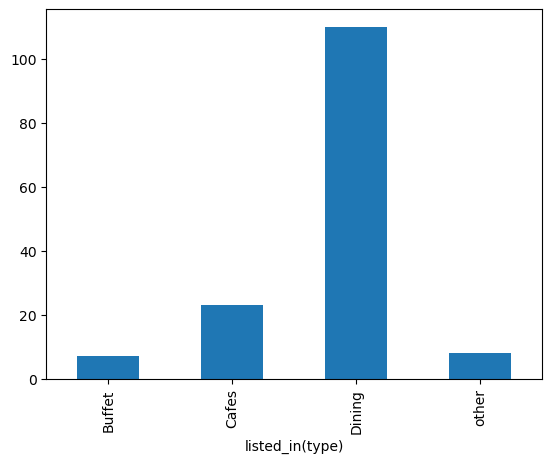

In [9]:
'''Exploring restuarant types.'''
df.groupby('listed_in(type)')['name'].count().plot.bar()
plt.show()

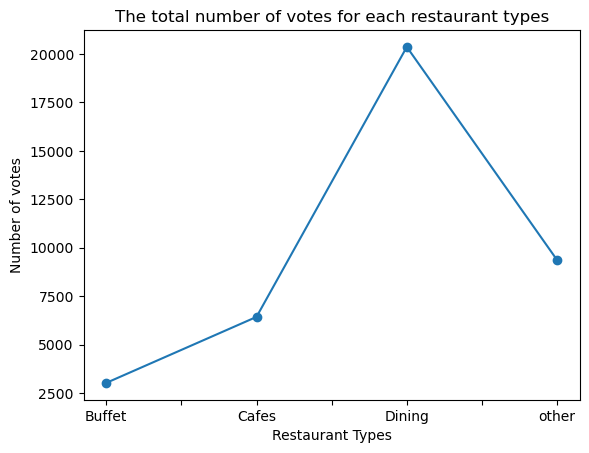

In [10]:
'''Exploring the total number of votes for each restuarant types'''
grouped_data = df.groupby('listed_in(type)')['votes'].sum()
grouped_data.plot.line( marker = 'o', title = 'The total number of votes for each restaurant types', ylabel = 'Number of votes', xlabel = 'Restaurant Types')
plt.show()

In [11]:
'''Identifying most voted restuarant'''
most_voted = df['votes'].max()
print('Restaurant with most votes')
df[df['votes'] == most_voted]['name']

Restaurant with most votes


38    Empire Restaurant
Name: name, dtype: object

online_order
No     90
Yes    58
Name: name, dtype: int64


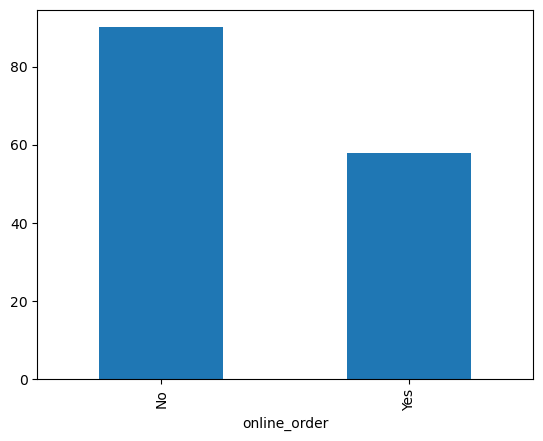

In [12]:
'''Exploring online availability'''
online_orders = df.groupby('online_order')['name'].count()
print(online_orders)
online_orders.plot.bar()
plt.show()

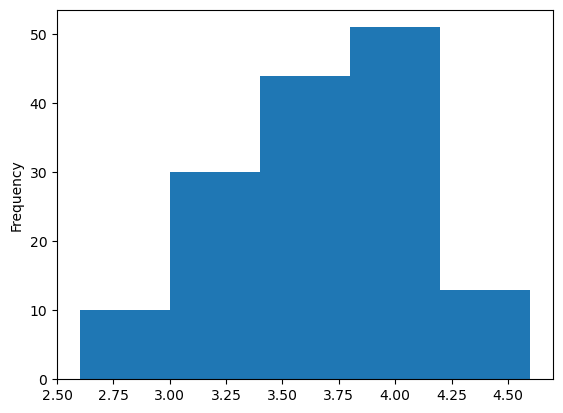

In [18]:
'''Analyzing ratings'''
df['rate'].plot.hist( bins =5)
plt.show()

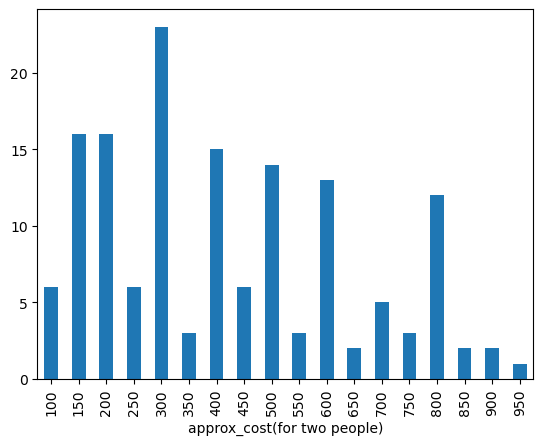

In [99]:
'''What price range couples prefer for dinning out'''
couple_data = df.groupby('approx_cost(for two people)')['approx_cost(for two people)'].count()
couple_data.plot.bar()
plt.show()

<Axes: xlabel='online_order', ylabel='rate'>

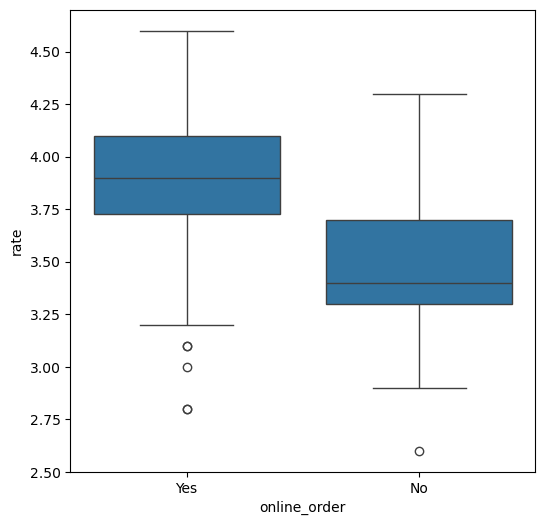

In [110]:
'''Ratings Comparison - Online vs Offline Orders
Compare ratings between restaurants that accept online orders and those that don't.'''
import seaborn as sns
plt.figure(figsize = (6,6))
sns.boxplot(x = 'online_order', y = 'rate', data = df)

In [43]:
'''Order mode preferences by restaurant types.'''
pivot = df.pivot_table( index = 'listed_in(type)', columns ='online_order', aggfunc = 'size', fill_value = 0)
display(pivot)
pivot.shape

online_order,No,Yes
listed_in(type),,
Buffet,3,4
Cafes,8,15
Dining,77,33
other,2,6


(4, 2)

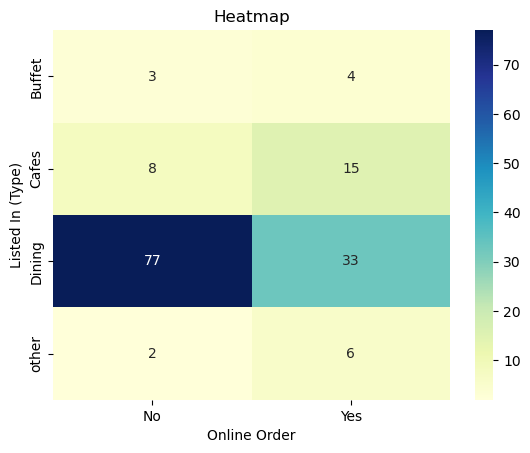

In [41]:
import seaborn as sns
sns.heatmap(pivot, annot = True, cmap='YlGnBu', fmt='d' )
plt.title('Heatmap')
plt.xlabel('Online Order')
plt.ylabel('Listed In (Type)')
plt.show()